Installation des bibliothèques

In [ ]:
!pip install tweepy --upgrade
!pip install pandas --upgrade
!pip install openpyxl --upgrade
!pip install textblob --upgrade

Imports des bibliothèques

In [1]:
import tweepy
import pandas as pd
import json
import re
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt

API credentials et connection à Twitter

In [2]:
#read credentials
f = open('credentials.json')
data = json.load(f)
f.close()

consumer_key = data["consumer_key"] #Your API/Consumer key 
consumer_secret = data["consumer_secret"] #Your API/Consumer Secret Key
access_token = data["access_token"]    #Your Access token key
access_token_secret = data["access_token_secret"] #Your Access token Secret key

# Connect to twitter API
auth = tweepy.OAuth1UserHandler(
    consumer_key, consumer_secret,
    access_token, access_token_secret
)
api = tweepy.API(auth, wait_on_rate_limit=True)

Recherche par mots clés

In [3]:
keywords = 'GPT-3'
no_of_tweets = 10000

Récupération des tweets en prenant compte des mots clés et de la langue

In [23]:
tweets = tweepy.Cursor(api.search_tweets, q = "GPT3 lang:en OR lang:fr", count = no_of_tweets, tweet_mode = 'extended').items(no_of_tweets)

data = []
columns = ['user', 'Tweet', 'likes', 'retweets', 'source', 'created_at']

for tweet in tweets : 
    data.append([tweet.user.screen_name, tweet.full_text, tweet.favorite_count, tweet.retweet_count, tweet.source, tweet.created_at])

df = pd.DataFrame(data, columns = columns)
print(df)

               user                                              Tweet  likes  \
0          mirasvit  A #GPT3/#ChatGPT-powered future is here for yo...      0   
1     we_arent_here  @Grady_Booch The biggest flaw of GPT3.5 was th...      0   
2        _OliviaBot  RT @KirkDBorne: 5 Reasons why Large Language M...      0   
3      MartoutaTech  RT @KirkDBorne: 5 Reasons why Large Language M...      0   
4         shrivivek  RT @glebich: GPT3 Chat Interface launcher - Im...      0   
...             ...                                                ...    ...   
8149        SSXman2  RT @efipm: 📌 I just published \n``The costs an...      0   
8150  LivingDataLab  RT @nathanbenaich: On point \n\nhttps://t.co/H...      0   
8151         genmon  @labenz @levelsio Are there any clues on capac...      0   
8152    nicobermond  https://t.co/si1lC0e000, un puissant outil qui...      1   
8153       UfiTrust  RT @teachermaticai: Join our launch webinar an...      0   

      retweets             

In [24]:
df_copy = df.copy()

In [44]:
df = df_copy.copy()

In [39]:
print(df)

               user                                              Tweet  likes  \
0          mirasvit  A #GPT3/#ChatGPT-powered future is here for yo...      0   
1     we_arent_here  @Grady_Booch The biggest flaw of GPT3.5 was th...      0   
2        _OliviaBot  RT @KirkDBorne: 5 Reasons why Large Language M...      0   
3      MartoutaTech  RT @KirkDBorne: 5 Reasons why Large Language M...      0   
4         shrivivek  RT @glebich: GPT3 Chat Interface launcher - Im...      0   
...             ...                                                ...    ...   
8149        SSXman2  RT @efipm: 📌 I just published \n``The costs an...      0   
8150  LivingDataLab  RT @nathanbenaich: On point \n\nhttps://t.co/H...      0   
8151         genmon  @labenz @levelsio Are there any clues on capac...      0   
8152    nicobermond  https://t.co/si1lC0e000, un puissant outil qui...      1   
8153       UfiTrust  RT @teachermaticai: Join our launch webinar an...      0   

      retweets             

Représentation graphique des j'aimes sur les tweets en lien avec GPT

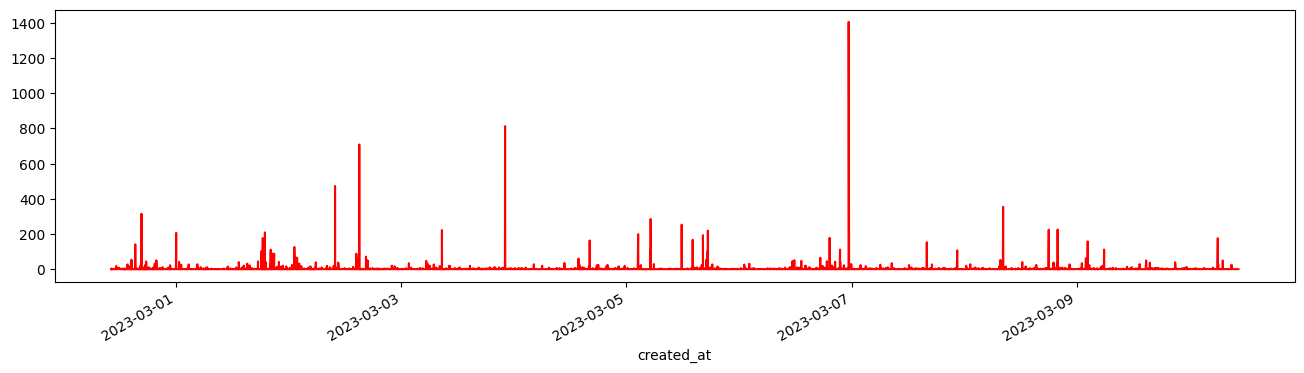

In [9]:
time_likes = pd.Series(data = df['likes'].values, index = df['created_at'])
time_likes.plot(figsize=(16,4), color ='r')
plt.show()

Analyse des sentiments des tweets

In [4]:
#Récupération des textes des tweets
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [6]:
#Analyse des sentiments
def analysis_sentiment(tweet):
    analysis = TextBlob(clean_tweet(tweet))

    if analysis.sentiment.polarity > 0: 
        return 1
    elif analysis.sentiment.polarity == 0: 
        return 0
    else : 
        return -1

Ajout des données de l'analyses des sentiments au DataFrame

In [45]:
df['sentiment'] = np.array([analysis_sentiment(tweet) for tweet in df['Tweet']])

In [43]:
print(df)

               user                                              Tweet  likes  \
0          mirasvit  A #GPT3/#ChatGPT-powered future is here for yo...      0   
1     we_arent_here  @Grady_Booch The biggest flaw of GPT3.5 was th...      0   
2        _OliviaBot  RT @KirkDBorne: 5 Reasons why Large Language M...      0   
3      MartoutaTech  RT @KirkDBorne: 5 Reasons why Large Language M...      0   
4         shrivivek  RT @glebich: GPT3 Chat Interface launcher - Im...      0   
...             ...                                                ...    ...   
8149        SSXman2  RT @efipm: 📌 I just published \n``The costs an...      0   
8150  LivingDataLab  RT @nathanbenaich: On point \n\nhttps://t.co/H...      0   
8151         genmon  @labenz @levelsio Are there any clues on capac...      0   
8152    nicobermond  https://t.co/si1lC0e000, un puissant outil qui...      1   
8153       UfiTrust  RT @teachermaticai: Join our launch webinar an...      0   

      retweets             

Export du DataFrame en excel

In [46]:
# Create a sample DataFrame with datetime values
#df['created_at'] = pd.DataFrame({'created_at': [pd.Timestamp('2022-02-28'), pd.Timestamp('2023-03-15')]})

# Define a custom datetime format
datetime_format = '%Y-%m-%d %H:%M:%S'

# Convert the datetime values to strings with the custom format
df['created_at'] = df['created_at'].apply(lambda x: x.strftime(datetime_format))

In [47]:
print(df)


               user                                              Tweet  likes  \
0          mirasvit  A #GPT3/#ChatGPT-powered future is here for yo...      0   
1     we_arent_here  @Grady_Booch The biggest flaw of GPT3.5 was th...      0   
2        _OliviaBot  RT @KirkDBorne: 5 Reasons why Large Language M...      0   
3      MartoutaTech  RT @KirkDBorne: 5 Reasons why Large Language M...      0   
4         shrivivek  RT @glebich: GPT3 Chat Interface launcher - Im...      0   
...             ...                                                ...    ...   
8149        SSXman2  RT @efipm: 📌 I just published \n``The costs an...      0   
8150  LivingDataLab  RT @nathanbenaich: On point \n\nhttps://t.co/H...      0   
8151         genmon  @labenz @levelsio Are there any clues on capac...      0   
8152    nicobermond  https://t.co/si1lC0e000, un puissant outil qui...      1   
8153       UfiTrust  RT @teachermaticai: Join our launch webinar an...      0   

      retweets             

In [48]:
df.to_excel(r'D:\maxim\Documents\Projects\CollecteDesDonnees\Twitter\UserKeywordsGPT.xlsx', index=False)